<a href="https://colab.research.google.com/github/abhinav-syl/sales_anomaly/blob/main/Sales_anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import csv
import os
import random
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

In [67]:
list_row=[]
date=[]
traffic=[]
order=[]
url=[]
with open('/content/submission.csv','r',newline='') as file:
  reader = csv.reader(file)
  for row in reader:
    if row[0]!='Date':
     traffic.append(row[2])
     order.append(row[3])
     print(row)
     if row[0] not in date:
       date.append(row[0])     
     if row[1] not in url:
       url.append(row[1])
     list_row.append(row)
print(date)
print(url)
print(traffic)
print(order)
print(len(traffic))

Streaming output truncated to the last 5000 lines.
['23/9/2019', 'google.com/nlp/5/', '24', '1']
['23/9/2019', 'google.com/nlp/6/', '18', '9']
['23/9/2019', 'google.com/nlp/7/', '19', '13']
['23/9/2019', 'google.com/nlp/8/', '35', '14']
['23/9/2019', 'google.com/nlp/9/', '32', '25']
['23/9/2019', 'google.com/nlp/10/', '27', '8']
['23/9/2019', 'google.com/nlp/11/', '36', '27']
['23/9/2019', 'google.com/nlp/12/', '27', '2']
['23/9/2019', 'google.com/nlp/13/', '31', '25']
['23/9/2019', 'google.com/nlp/14/', '39', '26']
['23/9/2019', 'google.com/nlp/15/', '42', '26']
['23/9/2019', 'google.com/nlp/16/', '47', '1']
['23/9/2019', 'google.com/nlp/17/', '42', '39']
['23/9/2019', 'google.com/nlp/18/', '32', '16']
['23/9/2019', 'google.com/nlp/19/', '35', '32']
['23/9/2019', 'google.com/nlp/20/', '35', '27']
['23/9/2019', 'google.com/nlp/21/', '48', '20']
['23/9/2019', 'google.com/nlp/22/', '40', '37']
['23/9/2019', 'google.com/nlp/23/', '52', '6']
['23/9/2019', 'google.com/nlp/24/', '29', '24']


In [68]:
def calendar(date):
 d1=[]
 m1=[]
 y1=[]
 for i in date:
   a = i.split('/')
   if a[0] not in d1:
     d1.append(a[0])
   if a[1] not in m1:
     m1.append(a[1])
   if a[2] not in y1:
     y1.append(a[2])
 print(d1)
 print(m1)
 print(y1)
 m2={'1':31,'2':28,'3':31,'4':30,'5':31,'6':30,'7':31,'8':31,'9':30,'10':31,'11':30,'12':31}

 y1.append('2020')
 y1.append('2021')
 print(y1) 
 date=[]
 for i in y1:
   for j in m2:
     len = m2[j]
     if (int(i)%4)==0 and j=='2':
       len=29
     for k in range(1,len+1):
       temp = str(k)+'/'+j+'/'+i
       date.append(temp)
 return date,y1,m1,d1

In [69]:
date,year_all,month_all,date_all = calendar(date)
print(date)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
['2015', '2016', '2017', '2018', '2019']
['2015', '2016', '2017', '2018', '2019', '2020', '2021']
['1/1/2015', '2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015', '6/1/2015', '7/1/2015', '8/1/2015', '9/1/2015', '10/1/2015', '11/1/2015', '12/1/2015', '13/1/2015', '14/1/2015', '15/1/2015', '16/1/2015', '17/1/2015', '18/1/2015', '19/1/2015', '20/1/2015', '21/1/2015', '22/1/2015', '23/1/2015', '24/1/2015', '25/1/2015', '26/1/2015', '27/1/2015', '28/1/2015', '29/1/2015', '30/1/2015', '31/1/2015', '1/2/2015', '2/2/2015', '3/2/2015', '4/2/2015', '5/2/2015', '6/2/2015', '7/2/2015', '8/2/2015', '9/2/2015', '10/2/2015', '11/2/2015', '12/2/2015', '13/2/2015', '14/2/2015', '15/2/2015', '16/2/2015', '17/2/2015', '18/2/2015', '19/2/2015', '20/2/2015', '21/2/2015', '

In [6]:
print(date_all)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']


In [70]:
holiday=[]
for i in year_all:
  a = "/15/8/" +i
  holiday.append(a)
  b = '26/1/'+i
  holiday.append(b) 
  b = '14/11/'+i
  holiday.append(b)
  b = '26/10/'+i
  holiday.append(b)
  b = '1/1/'+i
  holiday.append(b)
  b = '3/3/'+i
  holiday.append(b)
print(holiday)

['/15/8/2015', '26/1/2015', '14/11/2015', '26/10/2015', '1/1/2015', '3/3/2015', '/15/8/2016', '26/1/2016', '14/11/2016', '26/10/2016', '1/1/2016', '3/3/2016', '/15/8/2017', '26/1/2017', '14/11/2017', '26/10/2017', '1/1/2017', '3/3/2017', '/15/8/2018', '26/1/2018', '14/11/2018', '26/10/2018', '1/1/2018', '3/3/2018', '/15/8/2019', '26/1/2019', '14/11/2019', '26/10/2019', '1/1/2019', '3/3/2019', '/15/8/2020', '26/1/2020', '14/11/2020', '26/10/2020', '1/1/2020', '3/3/2020', '/15/8/2021', '26/1/2021', '14/11/2021', '26/10/2021', '1/1/2021', '3/3/2021']


In [71]:
week=['mon','tues','wed','thur','fri','sat','sun']
count=3
day={}
for i in date:
  if count==7:
    count=0
  day[i]=week[count]
  count=count+1
for row in list_row:
  if row[0] in holiday:
    row.append(1)
  else:
    row.append(0)
  row.append(day[row[0]])
  

In [9]:
print(day)

{'1/1/2015': 'thur', '2/1/2015': 'fri', '3/1/2015': 'sat', '4/1/2015': 'sun', '5/1/2015': 'mon', '6/1/2015': 'tues', '7/1/2015': 'wed', '8/1/2015': 'thur', '9/1/2015': 'fri', '10/1/2015': 'sat', '11/1/2015': 'sun', '12/1/2015': 'mon', '13/1/2015': 'tues', '14/1/2015': 'wed', '15/1/2015': 'thur', '16/1/2015': 'fri', '17/1/2015': 'sat', '18/1/2015': 'sun', '19/1/2015': 'mon', '20/1/2015': 'tues', '21/1/2015': 'wed', '22/1/2015': 'thur', '23/1/2015': 'fri', '24/1/2015': 'sat', '25/1/2015': 'sun', '26/1/2015': 'mon', '27/1/2015': 'tues', '28/1/2015': 'wed', '29/1/2015': 'thur', '30/1/2015': 'fri', '31/1/2015': 'sat', '1/2/2015': 'sun', '2/2/2015': 'mon', '3/2/2015': 'tues', '4/2/2015': 'wed', '5/2/2015': 'thur', '6/2/2015': 'fri', '7/2/2015': 'sat', '8/2/2015': 'sun', '9/2/2015': 'mon', '10/2/2015': 'tues', '11/2/2015': 'wed', '12/2/2015': 'thur', '13/2/2015': 'fri', '14/2/2015': 'sat', '15/2/2015': 'sun', '16/2/2015': 'mon', '17/2/2015': 'tues', '18/2/2015': 'wed', '19/2/2015': 'thur', '2

In [73]:
print(list_row[1:10])

[['1/1/2015', 'google.com/nlp/1/', '115', '58', 1, 'thur'], ['1/1/2015', 'google.com/nlp/2/', '123', '22', 1, 'thur'], ['1/1/2015', 'google.com/nlp/3/', '126', '20', 1, 'thur'], ['1/1/2015', 'google.com/nlp/4/', '107', '81', 1, 'thur'], ['1/1/2015', 'google.com/nlp/5/', '124', '109', 1, 'thur'], ['1/1/2015', 'google.com/nlp/6/', '114', '19', 1, 'thur'], ['1/1/2015', 'google.com/nlp/7/', '124', '118', 1, 'thur'], ['1/1/2015', 'google.com/nlp/8/', '127', '11', 1, 'thur'], ['1/1/2015', 'google.com/nlp/9/', '125', '14', 1, 'thur']]


In [74]:
list0=[]
listt=[]
listd=[]
for i in list_row:
  if i[1]=='google.com/nlp/0/':
   list0.append(i)
   listt.append(int(i[2]))
   listd.append(i[0])
print(list0)

[['1/1/2015', 'google.com/nlp/0/', '126', '19', 1, 'thur'], ['2/1/2015', 'google.com/nlp/0/', '76', '71', 0, 'fri'], ['3/1/2015', 'google.com/nlp/0/', '74', '48', 0, 'sat'], ['4/1/2015', 'google.com/nlp/0/', '80', '58', 0, 'sun'], ['5/1/2015', 'google.com/nlp/0/', '66', '29', 0, 'mon'], ['6/1/2015', 'google.com/nlp/0/', '72', '72', 0, 'tues'], ['7/1/2015', 'google.com/nlp/0/', '71', '35', 0, 'wed'], ['8/1/2015', 'google.com/nlp/0/', '75', '62', 0, 'thur'], ['9/1/2015', 'google.com/nlp/0/', '75', '28', 0, 'fri'], ['10/1/2015', 'google.com/nlp/0/', '69', '33', 0, 'sat'], ['11/1/2015', 'google.com/nlp/0/', '69', '37', 0, 'sun'], ['12/1/2015', 'google.com/nlp/0/', '66', '45', 0, 'mon'], ['13/1/2015', 'google.com/nlp/0/', '69', '57', 0, 'tues'], ['14/1/2015', 'google.com/nlp/0/', '68', '38', 0, 'wed'], ['15/1/2015', 'google.com/nlp/0/', '77', '25', 0, 'thur'], ['16/1/2015', 'google.com/nlp/0/', '70', '13', 0, 'fri'], ['17/1/2015', 'google.com/nlp/0/', '69', '41', 0, 'sat'], ['18/1/2015', 'g

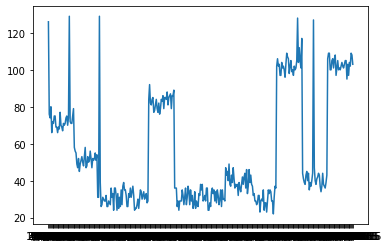

In [75]:
plt.plot(listd[0:365], listt[0:365])
plt.show()

In [76]:
def max(list1):
  maximus=0
  for i in list1:
    if int(i)>maximus:
      maximus=int(i)
  return maximus

In [77]:
max1= max(traffic)
print(max1)

174


In [78]:
for i in range(0,len(list_row)):
  list_row[i][2] = int(list_row[i][2])/max1
  list_row[i][3] = int(list_row[i][3])/max1

In [79]:
list_row[0:100]

[['1/1/2015',
  'google.com/nlp/0/',
  0.7241379310344828,
  0.10919540229885058,
  1,
  'thur'],
 ['1/1/2015',
  'google.com/nlp/1/',
  0.6609195402298851,
  0.3333333333333333,
  1,
  'thur'],
 ['1/1/2015',
  'google.com/nlp/2/',
  0.7068965517241379,
  0.12643678160919541,
  1,
  'thur'],
 ['1/1/2015',
  'google.com/nlp/3/',
  0.7241379310344828,
  0.11494252873563218,
  1,
  'thur'],
 ['1/1/2015',
  'google.com/nlp/4/',
  0.6149425287356322,
  0.46551724137931033,
  1,
  'thur'],
 ['1/1/2015',
  'google.com/nlp/5/',
  0.7126436781609196,
  0.6264367816091954,
  1,
  'thur'],
 ['1/1/2015',
  'google.com/nlp/6/',
  0.6551724137931034,
  0.10919540229885058,
  1,
  'thur'],
 ['1/1/2015',
  'google.com/nlp/7/',
  0.7126436781609196,
  0.6781609195402298,
  1,
  'thur'],
 ['1/1/2015',
  'google.com/nlp/8/',
  0.7298850574712644,
  0.06321839080459771,
  1,
  'thur'],
 ['1/1/2015',
  'google.com/nlp/9/',
  0.7183908045977011,
  0.08045977011494253,
  1,
  'thur'],
 ['1/1/2015',
  'google

In [80]:
def number_to_one_hot(list1):
  listi=[]
  for i in range(0,len(list1)):
    listi.append(i)
  one_hot = keras.utils.to_categorical(listi)
  dictf={}
  count=0
  for i in listi:
    code = one_hot[i]
    ind = list1[count]
    dictf[ind] = code
    count = count+1
  return dictf

In [81]:
season=['winter','summer','autumn','spring','rainy']
def cur_season(season,date):
  sess= number_to_one_hot(season)
  d = date.split('/')
  w = ['11','12','1']
  a=0
  s = ['5','6','7','8']
  sp = ['2','3','4']
  aut = ['10']
  ra = ['9']
  if d[1] in w:
    a= sess['winter']
  if d[1] in s:
    a= sess['summer']
  if d[1] in sp:
    a= sess['spring']
  if d[1] in aut:
    a= sess['autumn']
  if d[1] in ra:
    a= sess['rainy']
  return a

In [82]:
sess  = cur_season(season,'1/9/2019')
print(sess)

[0. 0. 0. 0. 1.]


In [83]:
week1 = number_to_one_hot(week)
print(week1)

{'mon': array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), 'tues': array([0., 1., 0., 0., 0., 0., 0.], dtype=float32), 'wed': array([0., 0., 1., 0., 0., 0., 0.], dtype=float32), 'thur': array([0., 0., 0., 1., 0., 0., 0.], dtype=float32), 'fri': array([0., 0., 0., 0., 1., 0., 0.], dtype=float32), 'sat': array([0., 0., 0., 0., 0., 1., 0.], dtype=float32), 'sun': array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)}


In [84]:
url_enc = number_to_one_hot(url)
print(url_enc)
print(len(url_enc))


{'google.com/nlp/0/': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 'google.com/nlp/1/': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 'google.com/nlp/2/': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 'google.com/nlp/3/': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.

In [85]:
#def date_enc(date):
#  dates=[]
#  for i in date:
    #print(i)
#    datess = i.split('/')
#    dates.append(datess)
#  date1={}
#  single = ['1','2','3','4','5','6','7','8','9']
#  for i in range(0,len(dates)):
#    for j in range(0,len(dates[i])):
#      if dates[i][j] in single:3
#        dates[i][j] = str(0)+dates[i][j]  
#  #print(dates)
#  count=0
#  for i in date:
#    date1[i] = dates[count]
#    count=count+1
  #print(date1)
#  return date1

In [86]:
def date_enc(date):
  days=[]
  months=[]
  years=[]
  final={}
  count=0
  for i in date:
    datess = i.split("/")
    if int(datess[0]) not in days:
      days.append(int(datess[0]))
    if int(datess[1]) not in months:
      months.append(int(datess[1]))
    if int(datess[2]) not in years:
      years.append(int(datess[2]))
  day_enc = number_to_one_hot(days)
  month_enc = number_to_one_hot(months)
  count=0
  last_year = int(years[-1])+1
  years.append(last_year)
  #print(days,months,years)
  years_enc = number_to_one_hot(years)
  #print("year_enc=",years_enc)
  count=0
  #print(years)
  #print(len(dates_enc),len(months_enc),years_enc)
  return day_enc,month_enc,years_enc

In [87]:
days,months,years = date_enc(date)

In [88]:
print(days)

{1: array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 2: array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 3: array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 4: array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 5: array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 6: array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 7: array([0., 0

In [90]:
def date_to_enc(date,days,months,years):
  dates = date.split("/")
  day = days[int(dates[0])]
  month = months[int(dates[1])]
  year = years[int(dates[2])]
  return day,month,year

In [91]:
d1,m1,y1 = date_to_enc('1/1/2020',days,months,years)
print(d1)
print(m1)
print(y1)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0.]


In [92]:
list_row[209]

['5/1/2015',
 'google.com/nlp/9/',
 0.41379310344827586,
 0.08045977011494253,
 0,
 'mon']

In [93]:
def conversion(week,days,months,years,url_enc,list_row):
  inp_day = []
  inp_mon = []
  inp_year = []
  inp_url=[]
  inp_week=[]
  inp_hol=[]
  out = []
  count=0
  for row in list_row:
       #print(row[0])
       d = row[0]
       d_split=d.split('/')
       if d_split[2]==str(year_all[0]):
         continue
       #print(d)
       d1,m1,y1 = date_to_enc(d,days,months,years)
       inp_day.append(d1)
       inp_mon.append(m1)
       inp_year.append(y1)
       u = url_enc[row[1]]
       inp_url.append(u)
       week1 = number_to_one_hot(week)
       week2 = week1[row[5]]
       inp_week.append(week2)
       t1 = row[2]
       inp_hol.append([row[4]])
       #for i in range(0,len(o)):
       #  b[i+len(t)] = t[i]
       out.append(t1)
       count = count+1
  return inp_day,inp_mon,inp_year,inp_url,inp_week,inp_hol,out

In [94]:
inp_day,inp_mon,inp_year,inp_url,inp_week,inp_hol,out = conversion(week,days,months,years,url_enc,list_row)
inp_day = np.array(inp_day)
inp_mon = np.array(inp_mon)
inp_year = np.array(inp_year)
inp_url = np.array(inp_url)
inp_week = np.array(inp_week)
inp_hol = np.array(inp_hol)
#inp = inp1.reshape((inp1.shape[0],1,inp1.shape[1]))
#inp = inp.reshape((inp.shape[0],1,inp.shape[1]))
print(inp_day.shape)
print(inp_day.dtype)
print(inp_mon.shape)
print(inp_year.shape)
print(inp_url.shape)
print(inp_url.dtype)
print(inp_week.shape)
print(inp_hol.shape)
out = np.array(out)
print(out.dtype)
print(out.shape)

(73000, 31)
float32
(73000, 12)
(73000, 8)
(73000, 50)
float32
(73000, 7)
(73000, 1)
float64
(73000,)


In [95]:
def d_input(date):
 dates_input = {}
 for i in date:
  d = i
  d_split=d.split('/')
  if d_split[2]==str(year_all[0]):
    continue
  #print('date=',d)
  ind = date.index(d)
  temp=[]
  #print(ind)
  last = url
  for i in range(1,8):
    last = date[ind-i]
    #print(last)
    temp.append(last)
  dates1=[]
  dates2=[]
  dates3=[]
  dates7=[]
  date_prev=[]
  d1 = temp[0]
  d2 = temp[0:2]
  d3 = temp[0:3]
  d7 = temp[0:7]
  d_last = d_split[0]+'/'+d_split[1]+'/'+str(int(d_split[2])-1)
  #print('1=',d1)
  #print('2=',d2)
  #print('3=',d3)
  #print('7=',d7)
  #print('last=',d_last)
  #print(temp)
  dates1.append(d1)
  dates2.append(d2)
  dates3.append(d3)
  dates7.append(d7)
  date_prev.append(d_last)
  list_temp=[]
  list_temp.append([dates1,dates2,dates3,dates7,date_prev])
  dates_input[d] = list_temp
 return dates_input

In [97]:
dates_input = d_input(date)

In [33]:
d = dates_input['1/1/2020']
print(d)

[[['31/12/2019'], [['31/12/2019', '30/12/2019']], [['31/12/2019', '30/12/2019', '29/12/2019']], [['31/12/2019', '30/12/2019', '29/12/2019', '28/12/2019', '27/12/2019', '26/12/2019', '25/12/2019']], ['1/1/2019']]]


In [99]:
def other_inputs(season):
 inp1=[]
 inp2=[]
 inp3=[]
 inp7=[]
 inp_prev=[]
 inp_sess=[]
 count=0
 for row in list_row:
  ind = count
  count=count+1
  d = row[0]
  d_split=d.split('/')
  if d_split[2]==str(year_all[0]):
    continue
  sess = cur_season(season,d)
  inp_sess.append(sess)
  d_prev = dates_input[d]
  d1 = d_prev[0][0]
  #print(d1)
  d2 = d_prev[0][1]
  d3 = d_prev[0][2]
  d7 = d_prev[0][3]
  d_year = d_prev[0][4]
  #print(d_year)
  u = row[1]
  t1=[]
  t2=[]
  t3=[]
  t7=[]
  t_prev=[]
  t_prev.append(list_row[ind-365*len(url)][2])
  for i in list_row[ind-400:ind]:
    #print('yo')
    if i[1]== u:
      if i[0]==d1[0]:
        #print(i[1])
        t1.append(i[2])
      for j in d2[0]:
        if i[0]==j:
          t2.append(i[2])
      for j in d3[0]:
        if i[0]==j:
          t3.append(i[2])
      for j in d7[0]:
        if i[0]==j:
          t7.append(i[2])
  if len(t1)!=1:
    t1.append(0)
  for j in range(0,7):
     if len(t7)!=7:
       t7.append(0)
  for j in range(0,2):
     if len(t2)!=2:
       t2.append(0)
  for j in range(0,3):
    if len(t3)!=3:
      t3.append(0)
  if len(t_prev)!=1:
    t_prev.append(0)
  inp1.append(t1)
  inp2.append(t2)
  inp3.append(t3)
  inp7.append(t7)
  inp_prev.append(t_prev)
 return inp1,inp2,inp3,inp7,inp_prev,inp_sess

In [100]:
inp1,inp2,inp3,inp7,inp_prev,inp_sess = other_inputs(season)
inp1 = np.array(inp1)
print(inp1.shape)
inp2 = np.array(inp2)
inp2= inp2.reshape(inp2.shape[0],inp2.shape[1],1)
print(inp2.shape)
inp3 = np.array(inp3)
inp3= inp3.reshape(inp3.shape[0],inp3.shape[1],1)
print(inp3.shape)
inp7 = np.array(inp7)
inp7= inp7.reshape(inp7.shape[0],inp7.shape[1],1)
print(inp7.shape)
inp_prev = np.array(inp_prev)
print(inp_prev.shape)
inp_sess = np.array(inp_sess)
print(inp_sess.shape)

(73000, 1)
(73000, 2, 1)
(73000, 3, 1)
(73000, 7, 1)
(73000, 1)
(73000, 5)


In [102]:
print(inp7[1])
print(inp3[1])

[[0.48850575]
 [0.54022989]
 [0.52298851]
 [0.54597701]
 [0.53448276]
 [0.54597701]
 [0.51149425]]
[[0.53448276]
 [0.54597701]
 [0.51149425]]


In [103]:
print(out[0])

0.7528735632183908


In [104]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense,LSTM,Flatten
from tensorflow.keras.layers import concatenate
# This returns a tensor
input_day = Input(shape=(inp_day.shape[1],),name = 'input_day')
input_mon = Input(shape=(inp_mon.shape[1],),name = 'input_mon')
input_year = Input(shape=(inp_year.shape[1],),name = 'input_year')
input_url = Input(shape=(inp_url.shape[1],),name = 'input_url')
input_week = Input(shape=(inp_week.shape[1],),name = 'input_week')
input_hol = Input(shape=(inp_hol.shape[1],),name = 'input_hol')
input_day1 = Input(shape=(inp1.shape[1],),name = 'input_day1')
input_day2 = Input(shape=(inp2.shape[1],inp2.shape[2]),name = 'input_day2')
input_day3 = Input(shape=(inp3.shape[1],inp3.shape[2]),name = 'input_day3')
input_day7 = Input(shape=(inp7.shape[1],inp7.shape[2]),name = 'input_day7')
input_day_prev = Input(shape=(inp_prev.shape[1],),name = 'input_day_prev')
input_day_sess = Input(shape=(inp_sess.shape[1],),name = 'input_day_sess')
# A layer instance is callable on a tensor, and returns a tensor
x1 = Dense(5, activation='relu')(input_day)
x2 = Dense(5, activation='relu')(input_mon)
x3 = Dense(5, activation='relu')(input_year)
x4 = Dense(5, activation='relu')(input_url)
x5 = Dense(5, activation='relu')(input_week)
x6 = Dense(5, activation='relu')(input_hol)
x7 = Dense(5, activation='relu')(input_day1)
x_8 = Dense(5, activation='relu')(input_day2)
x__8 = LSTM(5,return_sequences=True)(x_8)
x8 = Flatten()(x__8)
x_9 = Dense(5, activation='relu')(input_day3)
x__9 = LSTM(5,return_sequences=True)(x_9)
x9 = Flatten()(x__9)
x_10 = Dense(5, activation='relu')(input_day7)
x__10 = LSTM(5,return_sequences=True)(x_10)
x10 = Flatten()(x__10)
x11 = Dense(5, activation='relu')(input_day_prev)
x12 = Dense(5, activation='relu')(input_day_sess)
c = concatenate([x1, x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12])
layer1 = Dense(64,activation='relu')(c)
outputs = Dense(1, activation='sigmoid')(layer1)
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=[input_day,input_mon,input_year,input_url,input_week,input_hol,input_day1,input_day2,input_day3,input_day7,input_day_prev,input_day_sess], outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_day2 (InputLayer)         [(None, 2, 1)]       0                                            
__________________________________________________________________________________________________
input_day3 (InputLayer)         [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
input_day7 (InputLayer)         [(None, 7, 1)]       0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 2, 5)         10          input_day2[0][0]                 
____________________________________________________________________________________________

In [105]:
#model  = tf.keras.models.Functional([
#     tf.keras.layers.Dense(32,activation="relu",input_shape = (1,100)),
#     tf.keras.layers.LSTM(32),
     #tf.keras.layers.Dense(64,activation="relu"),
     #tf.keras.layers.Dense(32,activation="relu"),
     #tf.keras.layers.Dropout(0.01),
     #tf.keras.layers.Dense(101,activation="softmax")
#])
#model.summary()

In [106]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss=['mean_squared_error'],
              optimizer = 'adam',
              metrics = ['acc']
              )

In [110]:
history = model.fit(
           x = [inp_day,inp_mon,inp_year,inp_url,inp_week,inp_hol,inp1,inp2,inp3,inp7,inp_prev,inp_sess],
           y = out,
           batch_size=8,
           steps_per_epoch=1000,
           epochs = 20,
           verbose=1,
           shuffle =False
           )

Epoch 1/20
1000/1000 [==============================] - 5s 5ms/step - loss: 7.0332e-04 - acc: 0.0000e+00
Epoch 2/20
1000/1000 [==============================] - 5s 5ms/step - loss: 5.6409e-04 - acc: 0.0000e+00
Epoch 3/20
1000/1000 [==============================] - 5s 5ms/step - loss: 6.0048e-04 - acc: 0.0000e+00
Epoch 4/20
1000/1000 [==============================] - 5s 5ms/step - loss: 5.4258e-04 - acc: 0.0000e+00
Epoch 5/20
1000/1000 [==============================] - 5s 5ms/step - loss: 6.0785e-04 - acc: 0.0000e+00
Epoch 6/20
1000/1000 [==============================] - 5s 5ms/step - loss: 5.5314e-04 - acc: 0.0000e+00
Epoch 7/20
1000/1000 [==============================] - 5s 5ms/step - loss: 6.1452e-04 - acc: 0.0000e+00
Epoch 8/20
1000/1000 [==============================] - 5s 5ms/step - loss: 5.6954e-04 - acc: 0.0000e+00
Epoch 9/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0025 - acc: 0.0000e+00
Epoch 10/20
1000/1000 [==============================] - 5s

In [111]:
def testing(date,url_name,traffic,order,maxj):
       out=[]
       ans=0
       for i in list_row:
         if i[0]==date and i[1]==url_name:
           ans=1
       if ans==0:
         list_row.append([date,url_name,traffic,order])
         print(ans)
       d1,d2,d3 = date_to_enc(date,days,months,years)
       #print(da)
       #print(d[0])
       print('date=',date)
       #print(inp[0][count])
       #print(count)
       us = url_enc[url_name]
       us = np.array([us])
       #t1 = int(traffic/maxj)
       d1 = np.array([d1])
       #print(d1.shape)
       d2 = np.array([d2])
       d3 = np.array([d3])
       #print(d2.shape)
       #print(d3.shape)
       #print(us.shape)
       week1 = number_to_one_hot(week)
       week2 = week1[day[date]]
       #print(day[date])
       week2=np.array([week2])
       #print(week2)
       #print("date=",date)
       if date in holiday:
         h=1
         #print('holiday')
       else:
         h=0
         #print("no holiday")
       h = np.array([h])
       #print(h)
       count=-1
       ind=0
       #print(date)
       #print(us)
       for i in list_row:
         count =count+1
         #print(count)
         #print(i[0],i[1])
         #print(date,us)
         if i[0]==date and i[1]==url_name:
           #print("found")
           ind = count
       print("ind=",ind)
       sess = cur_season(season,date)
       #print(sess)
       d_prev = dates_input[date]
       #print(d_prev)
       d11 = d_prev[0][0]
       #print(d1)
       d22 = d_prev[0][1]
       d33 = d_prev[0][2]
       d7 = d_prev[0][3]
       d_year = d_prev[0][4]
       t1=[]
       t2=[]
       t3=[]
       t7=[]
       t_prev=[]
       t_prev.append(list_row[ind-365*len(url)][2])
       #print(list_row[ind-366*len(url)])
       #print(list_row[ind-365*len(url)])
       print("t-prev",t_prev)
       for i in list_row[ind-400:ind+1]:
          #print('yo')
          if i[1]== url_name:
            if i[0]==d11[0]:
              #print(i[1])
               t1.append(i[2])
            for j in d22[0]:
              if i[0]==j:
                t2.append(i[2])
            for j in d33[0]:
              if i[0]==j:
                t3.append(i[2])
            for j in d7[0]:
              if i[0]==j:
                t7.append(i[2])
       if len(t1)!=1:
          t1.append(0)
       for j in range(0,7):
          if len(t7)!=7:
            t7.append(0)
       for j in range(0,2):
         if len(t2)!=2:
           t2.append(0)
       for j in range(0,3):
         if len(t3)!=3:
          t3.append(0)
       if len(t_prev)!=1:
         t_prev.append(0)
       t1 = np.array([t1])
       print('t1=',t1)
       t2 = np.array([t2])
       print('t2=',t2)
       t3 = np.array([t3])
       t3 = t3.reshape(1,3,1)
       print('t3=',t3)
       t7 = np.array([t7])
       t7 = t7.reshape(1,7,1)
       print('t7=',t7)
       t_prev = np.array([t_prev])
       print("prev=",t_prev)
       sess = np.array([sess])
       y_out = model.predict([d1,d2,d3,us,week2,h,t1,t2,t3,t7,t_prev,sess])
       print("output=",y_out)
       #print(y_out.shape)
       #print(list_row[ind])
       print("output after processing=",y_out[0][0]*maxj)
       #sales on the date
       print("sales on date=",list_row[ind][2]*maxj)
       e1 = y_out[0][0]*maxj- list_row[ind][2]*maxj
       print('change from expected value= ',e1)
       if (abs(e1)>50):
         print("anomaly")
       return y_out[0][0]*maxj

In [117]:
a= testing('1/1/2016','google.com/nlp/0/',116,50,max1)

date= 1/1/2016
ind= 18250
t-prev [0.7241379310344828]
t1= [[0.59195402]]
t2= [[0.62068966 0.59195402]]
t3= [[[0.62643678]
  [0.62068966]
  [0.59195402]]]
t7= [[[0.59195402]
  [0.55747126]
  [0.59770115]
  [0.5862069 ]
  [0.62643678]
  [0.62068966]
  [0.59195402]]]
prev= [[0.72413793]]
output= [[0.73275685]]
output after processing= 127.49969244003296
sales on date= 131.0
change from expected value=  -3.500307559967041


In [113]:
print(list_row[-1])

['31/12/2019', 'google.com/nlp/49/', 0.896551724137931, 0.6091954022988506, 0, 'tues']


In [114]:
print(date)

['1/1/2015', '2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015', '6/1/2015', '7/1/2015', '8/1/2015', '9/1/2015', '10/1/2015', '11/1/2015', '12/1/2015', '13/1/2015', '14/1/2015', '15/1/2015', '16/1/2015', '17/1/2015', '18/1/2015', '19/1/2015', '20/1/2015', '21/1/2015', '22/1/2015', '23/1/2015', '24/1/2015', '25/1/2015', '26/1/2015', '27/1/2015', '28/1/2015', '29/1/2015', '30/1/2015', '31/1/2015', '1/2/2015', '2/2/2015', '3/2/2015', '4/2/2015', '5/2/2015', '6/2/2015', '7/2/2015', '8/2/2015', '9/2/2015', '10/2/2015', '11/2/2015', '12/2/2015', '13/2/2015', '14/2/2015', '15/2/2015', '16/2/2015', '17/2/2015', '18/2/2015', '19/2/2015', '20/2/2015', '21/2/2015', '22/2/2015', '23/2/2015', '24/2/2015', '25/2/2015', '26/2/2015', '27/2/2015', '28/2/2015', '1/3/2015', '2/3/2015', '3/3/2015', '4/3/2015', '5/3/2015', '6/3/2015', '7/3/2015', '8/3/2015', '9/3/2015', '10/3/2015', '11/3/2015', '12/3/2015', '13/3/2015', '14/3/2015', '15/3/2015', '16/3/2015', '17/3/2015', '18/3/2015', '19/3/2015', '20/3/2015',

In [115]:
def testmore(date_all,url_name,maxj):
  y=[]
  d=[]
  for i in range(365,730):
    print(date_all[i])
    y1 = testing(date_all[i],url_name,100,50,maxj)
    y.append(y1)
    d.append(date_all[i])
  return y,d

In [116]:
test,date = testmore(date,'google.com/nlp/0/',max1)

Streaming output truncated to the last 5000 lines.
sales on date= 80.0
change from expected value=  -2.6906702518463135
7/5/2016
date= 7/5/2016
ind= 24550
t-prev [0.4425287356321839]
t1= [[0.45977011]]
t2= [[0.47701149 0.45977011]]
t3= [[[0.5       ]
  [0.47701149]
  [0.45977011]]]
t7= [[[0.18390805]
  [0.45402299]
  [0.49425287]
  [0.49425287]
  [0.5       ]
  [0.47701149]
  [0.45977011]]]
prev= [[0.44252874]]
output= [[0.440055]]
output after processing= 76.56957221031189
sales on date= 88.00000000000001
change from expected value=  -11.430427789688125
8/5/2016
date= 8/5/2016
ind= 24600
t-prev [0.4482758620689655]
t1= [[0.50574713]]
t2= [[0.45977011 0.50574713]]
t3= [[[0.47701149]
  [0.45977011]
  [0.50574713]]]
t7= [[[0.45402299]
  [0.49425287]
  [0.49425287]
  [0.5       ]
  [0.47701149]
  [0.45977011]
  [0.50574713]]]
prev= [[0.44827586]]
output= [[0.45633066]]
output after processing= 79.40153431892395
sales on date= 80.0
change from expected value=  -0.5984656810760498
9/5/2016


In [118]:
print(test)
print(date)

[127.49969244003296, 67.73849362134933, 68.1020096540451, 70.29651063680649, 68.04619181156158, 69.77293574810028, 69.6135043501854, 70.19362825155258, 68.87380385398865, 67.45438992977142, 67.34625452756882, 66.53634095191956, 67.18176716566086, 66.80353957414627, 68.9065198302269, 67.65404605865479, 67.63414371013641, 67.20043015480042, 68.20607435703278, 67.75399339199066, 67.80045640468597, 68.34476333856583, 68.3916100859642, 67.42709290981293, 68.47465753555298, 124.37291836738586, 67.04313522577286, 66.7743912935257, 66.71467906236649, 68.60376870632172, 70.7175350189209, 53.252264857292175, 53.2967728972435, 52.60871583223343, 51.7299063205719, 51.01803696155548, 51.86512094736099, 49.87802857160568, 49.740044832229614, 50.063730239868164, 50.3054364323616, 49.77925318479538, 49.63820993900299, 50.61358577013016, 51.499898850917816, 49.59458863735199, 49.64804184436798, 50.464038133621216, 49.557184875011444, 49.927587389945984, 51.09421348571777, 50.39785945415497, 49.20665878

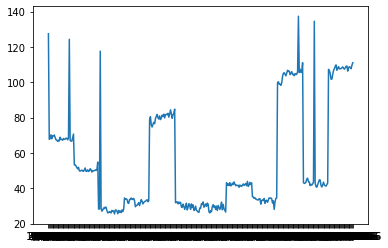

In [119]:
plt.plot(date,test)
plt.show()

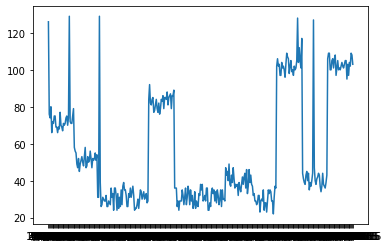

In [120]:
plt.plot(listd[0:365], listt[0:365])
plt.show()